In [2]:
import os
import os.path
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

In [3]:
#TestCases = ['CL_DDPG', 'CL_MADDPG', 'CG_DDPG', 'CG_MADDPG', 'NL_DDPG', 'NL_MADDPG', 'NG_DDPG', 'NG_MADDPG']
TestCases = ['NL_MADDPG']
colors=np.array(['grey', 'red', 'purple', 'blue', 'green'])
res_dir = '../results/'

for TC in TestCases: #各ベンチマークディレクトリ毎に
    if os.path.isdir(res_dir+TC): #ディレクトリがあることを確認、なければスキップ
        files = os.listdir(res_dir+TC) #ファイルリスト
        targetfiles = [l for l in files if ('benchmark' in l and '.csv' in l and 'lock' not in l)] #benchmarkと.csvを含むファイルのみを抽出
        df = pd.DataFrame([])
        print ('processing', TC)
        for f in targetfiles:
            fname = res_dir+ TC + '/' + f
            dft = pd.read_csv(fname, index_col=False, header=0, engine='python', dtype='str')
            var_lst = ['Global_counter','Episodes','Follower1','Follower2','Follower3','Leader','Prey','Mutual Collision']
            dft[var_lst] = dft[var_lst].astype(float)
            dft[var_lst] = dft[var_lst].astype(int)
            var_lst = ['mean rew F1',' mean rew F2',' mean rew F3',' mean rew L',' mean rew Prey',' mean rew total',' time']
            dft[var_lst] = dft[var_lst].astype(float)
            df = pd.concat([df, dft])
        

processing NL_MADDPG


In [4]:
gc = df['Global_counter'].unique() #結合したベンチマークデータからユニークなglobal_counterを抽出

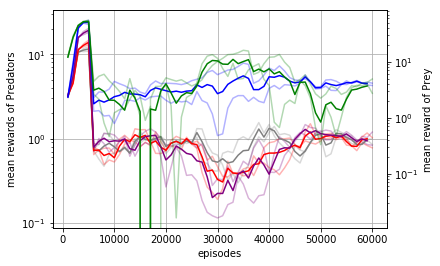

In [108]:
#対数グラフ
fig, ax1 = plt.subplots()
ax1.grid(True)
ax1.set_xlabel('episodes')
ax1.set_ylabel('mean rewards of Predators')
ax1.set_yscale("log")
ax2 = ax1.twinx()
ax2.set_ylabel('mean reward of Prey')
ax2.set_yscale("log")
for i in gc: #glocal-counter毎に
    temp_df = df[df['Global_counter'] == i] #あるTestCaseの同一global-counterのデータ
    rew_names = ['mean rew F1',' mean rew F2',' mean rew F3',' mean rew L',' mean rew Prey']
    labels = ['Follower1', 'Follower2', 'Follower3', 'Leader','Prey']
    for name, clr, lbl in zip(rew_names[:-1], colors[:-1], labels[:-1]):
        ax1.plot(temp_df['Episodes'], temp_df[name], c=clr, alpha=0.3, label=lbl)
    ax2.plot(temp_df['Episodes'], temp_df[rew_names[-1]].max()-temp_df[rew_names[-1]], c=colors[-1], alpha = 0.3, label=labels[-1])
    
# plot of all means
all_means = pd.DataFrame([]) 
for i in range(0, 60000, 1000):
    tdf = df[df['Episodes'] ==i]
    temp = pd.DataFrame(np.array([tdf[rew_names[l]].mean() for l in range(len(rew_names))]).reshape(1,len(rew_names)), columns=[labels[k] for k in range(len(rew_names))], index=[i])
    all_means = all_means.append(temp
for name, clr, lbl in zip(labels[:-1], colors[:-1], labels[:-1]):
    ax1.plot(all_means.index, all_means[name], c=clr, alpha=1.0, label=lbl)
ax2.plot(all_means.index, all_means[labels[-1]].max()-all_means[labels[-1]], c=colors[-1], alpha = 1.0, label=labels[-1])

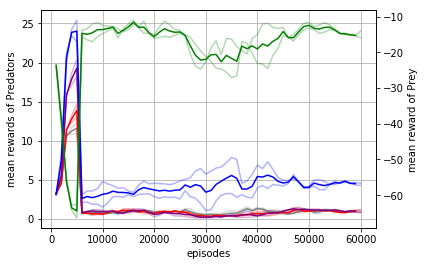

In [109]:
#普通グラフ
fig, ax1 = plt.subplots()
ax1.grid(True)
ax1.set_xlabel('episodes')
ax1.set_ylabel('mean rewards of Predators')
ax2 = ax1.twinx()
ax2.set_ylabel('mean reward of Prey')
for i in gc: #glocal-counter毎に
    temp_df = df[df['Global_counter'] == i] #あるTestCaseの同一global-counterのデータ
    rew_names = ['mean rew F1',' mean rew F2',' mean rew F3',' mean rew L',' mean rew Prey']
    labels = ['Follower1', 'Follower2', 'Follower3', 'Leader','Prey']
    for name, clr, lbl in zip(rew_names[:-1], colors[:-1], labels[:-1]):
        ax1.plot(temp_df['Episodes'], temp_df[name], c=clr, alpha=0.3, label=lbl)
    ax2.plot(temp_df['Episodes'], temp_df[rew_names[-1]], c=colors[-1], alpha = 0.3, label=labels[-1])
    
# plot of all means
all_means = pd.DataFrame([]) 
for i in range(0, 60000, 1000):
    tdf = df[df['Episodes'] ==i]
    temp = pd.DataFrame(np.array([tdf[rew_names[l]].mean() for l in range(len(rew_names))]).reshape(1,len(rew_names)), columns=[labels[k] for k in range(len(rew_names))], index=[i])
    all_means = all_means.append(temp)
for name, clr, lbl in zip(labels[:-1], colors[:-1], labels[:-1]):
    ax1.plot(all_means.index, all_means[name], c=clr, alpha=1.0, label=lbl)
ax2.plot(all_means.index, all_means[labels[-1]], c=colors[-1], alpha = 1.0, label=labels[-1])

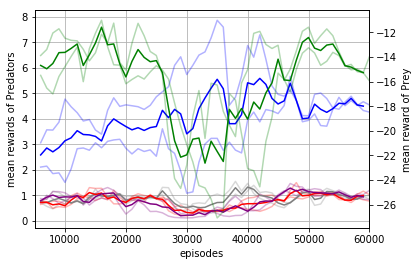

In [117]:
#普通グラフ-5000以上
fig, ax1 = plt.subplots()
ax1.grid(True)
ax1.set_xlabel('episodes')
ax1.set_ylabel('mean rewards of Predators')
ax2 = ax1.twinx()
ax2.set_ylabel('mean reward of Prey')
ax1.set_xlim(5000,60000)
ax2.set_xlim(5000,60000)
for i in gc: #glocal-counter毎に
    temp_df = df[df['Global_counter'] == i] #あるTestCaseの同一global-counterのデータ
    rew_names = ['mean rew F1',' mean rew F2',' mean rew F3',' mean rew L',' mean rew Prey']
    labels = ['Follower1', 'Follower2', 'Follower3', 'Leader','Prey']
    temp_df = temp_df[temp_df['Episodes']>5000]
    for name, clr, lbl in zip(rew_names[:-1], colors[:-1], labels[:-1]):
        ax1.plot(temp_df['Episodes'], temp_df[name], c=clr, alpha=0.3, label=lbl)
    ax2.plot(temp_df['Episodes'], temp_df[rew_names[-1]], c=colors[-1], alpha = 0.3, label=labels[-1])
    
# plot of all means
all_means = pd.DataFrame([]) 
for i in range(0, 60000, 1000):
    tdf = df[df['Episodes'] ==i]
    temp = pd.DataFrame(np.array([tdf[rew_names[l]].mean() for l in range(len(rew_names))]).reshape(1,len(rew_names)), columns=[labels[k] for k in range(len(rew_names))], index=[i])
    all_means = all_means.append(temp)
all_means = all_means[all_means.index>5000]
for name, clr, lbl in zip(labels[:-1], colors[:-1], labels[:-1]):
    ax1.plot(all_means.index, all_means[name], c=clr, alpha=1.0, label=lbl)
ax2.plot(all_means.index, all_means[labels[-1]], c=colors[-1], alpha = 1.0, label=labels[-1])

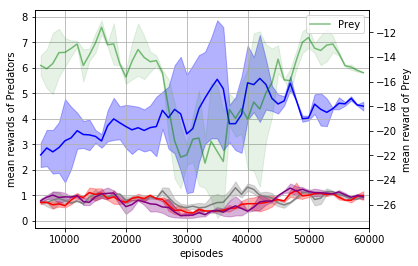

In [122]:
#Deepmind風グラフ-5000以上
fig, ax1 = plt.subplots()
ax1.grid(True)
ax1.set_xlabel('episodes')
ax1.set_ylabel('mean rewards of Predators')
ax2 = ax1.twinx()
ax2.set_ylabel('mean reward of Prey')
ax1.set_xlim(5000,60000)
ax2.set_xlim(5000,60000)
rew_names = ['mean rew F1',' mean rew F2',' mean rew F3',' mean rew L',' mean rew Prey']
labels = ['Follower1', 'Follower2', 'Follower3', 'Leader','Prey']
    
# plot of all means
all_means = pd.DataFrame([]) 
all_std = pd.DataFrame([]) 
for i in range(0, 60000, 1000):
    tdf = df[df['Episodes'] ==i]
    temp = pd.DataFrame(np.array([tdf[rew_names[l]].mean() for l in range(len(rew_names))]).reshape(1,len(rew_names)), columns=[labels[k] for k in range(len(rew_names))], index=[i])
    all_means = all_means.append(temp)
    temp = pd.DataFrame(np.array([tdf[rew_names[l]].std(ddof=0) for l in range(len(rew_names))]).reshape(1,len(rew_names)), columns=[labels[k] for k in range(len(rew_names))], index=[i])
    all_std = all_std.append(temp)
all_means = all_means[all_means.index>5000]
all_std =all_std[all_std.index>5000]
for name, clr, lbl in zip(labels[:-1], colors[:-1], labels[:-1]):
    ax1.plot(all_means.index, all_means[name], c=clr, alpha=1.0, label=lbl)
    ax1.fill_between(all_std.index, all_means[name]-all_std[name], all_means[name]+all_std[name], color=clr, alpha=0.3)
ax2.plot(all_means.index, all_means[labels[-1]], c=colors[-1], alpha = 0.5, label=labels[-1])
ax2.fill_between(all_std.index, all_means[labels[-1]]-all_std[labels[-1]], all_means[labels[-1]]+all_std[labels[-1]], color=colors[-1], alpha = 0.1)
plt.legend()

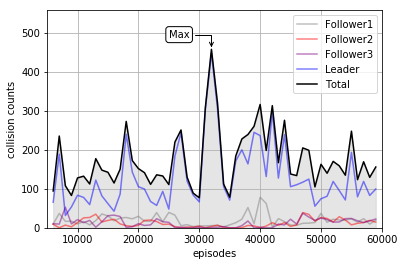

In [25]:
#Deepmind風グラフ-5000以上,　衝突回数
fig, ax1 = plt.subplots()
ax1.grid(True)
ax1.set_xlabel('episodes')
ax1.set_ylabel('collision counts')
ax1.set_xlim(5000,60000)
ax1.set_xlim(5000,60000)
names = ['Follower1','Follower2','Follower3','Leader','Prey', 'Mutual Collision']
labels =['Follower1','Follower2','Follower3','Leader','Total', 'Simultaneous Collisions']
alphas = [0.5, 0.5, 0.5, 0.5, 1.0, 1.0]
colors=np.array(['grey', 'red', 'purple', 'blue', 'black', 'cian'])

# plot of all means
all_means = pd.DataFrame([]) 
for i in range(0, 60000, 1000):
    tdf = df[df['Episodes'] ==i]
    temp = pd.DataFrame(np.array([tdf[names[l]].mean() for l in range(len(names))]).reshape(1,len(names)), columns=[labels[k] for k in range(len(names))], index=[i])
    all_means = all_means.append(temp)
all_means = all_means[all_means.index>5000]
for name, clr, lbl, al in zip(labels[:-1], colors[:-1], labels[:-1], alphas[:-1]):
    ax1.plot(all_means.index, all_means[name], c=clr, alpha=al, label=lbl)
ax1.fill_between(all_means.index, [0 for l in range(len(all_means.index))], all_means[labels[4]], color='grey', alpha=0.2)

#最大値のところにマーク
maxx = all_means['Total'].idxmax()
maxy = all_means['Total'].max()
arrow_dict = dict(arrowstyle = "->", color="black", connectionstyle = "angle, angleA = 0, angleB = 90")
text_dict = dict(boxstyle = "round", fc='white', ec='black')
ax1.annotate("Max", xy = (maxx, maxy), xytext=(maxx-7000, maxy+30), bbox=text_dict, arrowprops=arrow_dict)
ax1.set_ylim(0,maxy+100)

if not 0 in all_means[labels[-1]].values: #同時接触が1回でもあったら第2軸をプロット
    ax2 = ax1.twinx()
    ax2.set_ylabel('simultaneous collision counts')
    ax2.set_xlim(5000,60000)
    ax2.plot(all_means.index, all_means[labels[-1]], c=colors[-1], alpha = 1.0, label=labels[-1])
plt.legend()

In [31]:
a = all_means['Follower1']

In [36]:
labels =['Follower1','Follower2','Follower3','Leader','Total', 'Simultaneous Collisions']

In [38]:
labels[1:-1]

['Follower2', 'Follower3', 'Leader', 'Total']

In [39]:
TC

'NL_MADDPG'